In [1]:
from rdkit.Chem import PandasTools
import pandas as pd
import seaborn as sns

In [16]:
df = PandasTools.LoadSDF("Enamine_REAL_TC_gt_14_minimized.sdf.gz")

In [17]:
df['idx'] = range(0,len(df))

In [18]:
df.shape

(6556, 3)

In [19]:
score_df = pd.read_csv("Enamine_REAL_TC_gt_14_min_log_v2.csv")

In [20]:
score_df.shape

(6552, 5)

In [21]:
score_df.head()

,idx,name,init_energy,final_energy,rms
0,0,5439040_12529118,130.770596,-39.649301,0.900786
1,1,8254302_12529118,957.254635,-44.349467,1.700543
2,2,11353774_13812584,105.351369,-20.415948,0.928868
3,3,5439040_15082468,118.426738,-49.833348,0.910969
4,4,136551_18336802,463.806550,7.880862,1.007667


In [22]:
sns.set_context('talk')

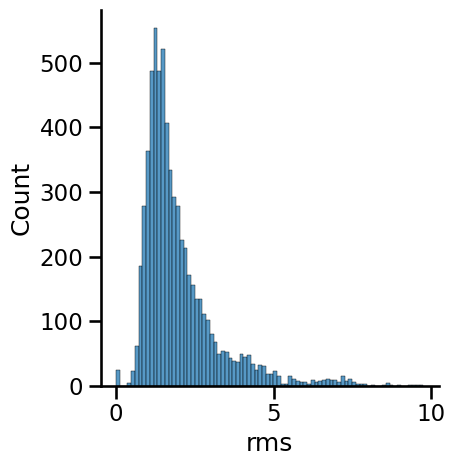

In [9]:
sns.displot(score_df.query("rms < 10").rms)

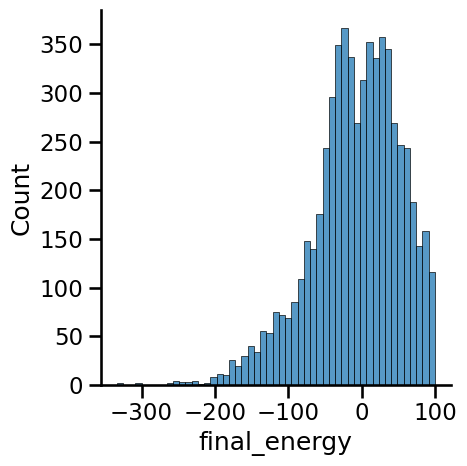

In [10]:
sns.displot(score_df.query("final_energy < 100").final_energy)

In [11]:
merge_df = df.merge(score_df,on="idx")

In [12]:
pick_df = merge_df.query("final_energy < 0 and rms < 1.5")

In [13]:
props = [x for x in pick_df.columns if x != 'ROMol']

In [14]:
PandasTools.WriteSDF(pick_df,"picks_min.sdf",properties=props)

In [15]:
pick_df.shape

(1439, 7)